C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Admin\AppData\Local\Programs\Python\Pytho


Evaluation Metrics for K-Means:
Silhouette Score: 0.551
Davies-Bouldin Index: 0.666
Calinski-Harabasz Index: 561.594


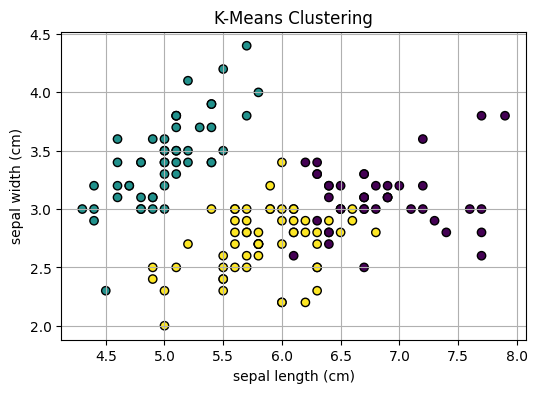


Evaluation Metrics for Affinity Propagation:
Silhouette Score: 0.347
Davies-Bouldin Index: 0.985
Calinski-Harabasz Index: 443.797


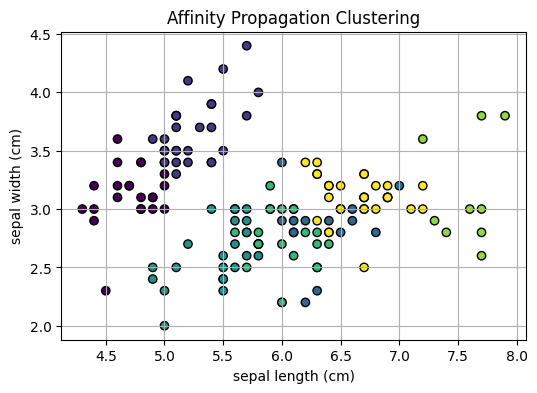


Evaluation Metrics for Birch:
Silhouette Score: 0.502
Davies-Bouldin Index: 0.626
Calinski-Harabasz Index: 458.473


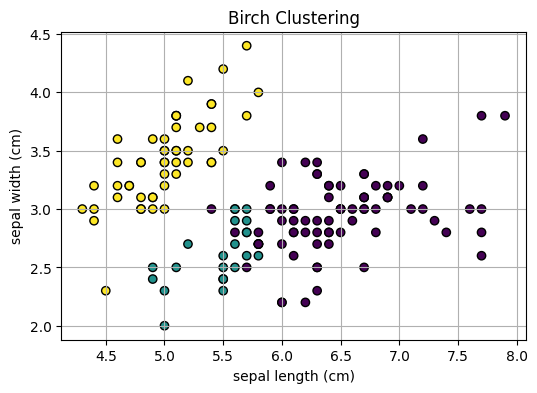

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, Birch 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

selected_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = data[selected_features]

def kmeans_clustering(X, n_clusters=3):
    model = KMeans(n_clusters=n_clusters, random_state=42) 
    labels = model.fit_predict(X)
    return labels

def affinity_propagation_clustering(X):
    model = AffinityPropagation() 
    labels = model.fit_predict(X) 
    return labels

def birch_clustering(X, n_clusters=3): 
    model = Birch(n_clusters=n_clusters) 
    labels = model.fit_predict(X)
    return labels

def evaluate_clustering(X, labels, algorithm): 
    silhouette = silhouette_score(X, labels) 
    db_index = davies_bouldin_score(X, labels) 
    ch_index = calinski_harabasz_score(X, labels)

    print(f'\nEvaluation Metrics for {algorithm}:') 
    print(f'Silhouette Score: {silhouette:.3f}') 
    print(f'Davies-Bouldin Index: {db_index:.3f}')
    print(f'Calinski-Harabasz Index: {ch_index:.3f}')

def plot_clusters(X, labels, algorithm):
    plt.figure(figsize=(6, 4))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
    plt.title(f'{algorithm} Clustering') 
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1]) 
    plt.grid(True)
    plt.show()

kmeans_labels = kmeans_clustering(X)
evaluate_clustering(X, kmeans_labels, 'K-Means')
plot_clusters(X, kmeans_labels, 'K-Means')

affinity_labels = affinity_propagation_clustering(X)
evaluate_clustering(X, affinity_labels, 'Affinity Propagation')
plot_clusters(X, affinity_labels, 'Affinity Propagation')

birch_labels = birch_clustering(X)
evaluate_clustering(X, birch_labels, 'Birch')
plot_clusters(X, birch_labels, 'Birch')
